In [2]:
import networkx as nx

# for drawing
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


In [3]:

def general_neighborhood(G, k, x):
    # If x is not in G, raise a KeyError with an error message
    if x not in G:
        raise KeyError(f'Oops, there is no node with label "{x}" in the graph')

    # Using DFS(depth first search) to find nodes within distance k of x
    stack = [(x, 0)]
    visited = {x}
    neighbors = {x}  
    while stack:
        u, d = stack.pop()  # Pop the last element of the DFS stack
        if d < k:  # If the depth of the popped node is less than k
            for v in G[u]:  # Iterating over the neighbors of the popped node u
                if v not in visited:  
                    # Adding the neighbor v to the set of visited nodes
                    visited.add(v)
                    # we apend the neighbor v onto the DFS stack with a depth of d+1
                    stack.append((v, d+1))
                    # finally, we add the neighbor v to the set of neighbors
                    neighbors.add(v)

    #  returning a list of the set of neighbors 
    return list(neighbors)


In [6]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 6), (2, 5), (2, 3), (2, 4), (4,9),(9,10), (6,8),(6,7)])
print(general_neighborhood(G, 2, 1))  # Output: [1, 2, 3, 4]
print(general_neighborhood(G, 3, 1))  # Output: [3, 4, 2]
# Raises KeyError: Oops, there is no node with label "5" in the graph
#print(general_neighborhood(G, 3, 5))


[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [28]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (1,3), (4, 2), (6, 1), (2, 5), (5, 8), (3,7)])
print(general_neighborhood(G, 2, 1)) 
#print(general_neighborhood(G, 3, 1))
print(general_neighborhood(G, 2, 9))  

[1, 2, 3, 5, 7]


KeyError: 'Oops, there is no node with label "9" in the graph'

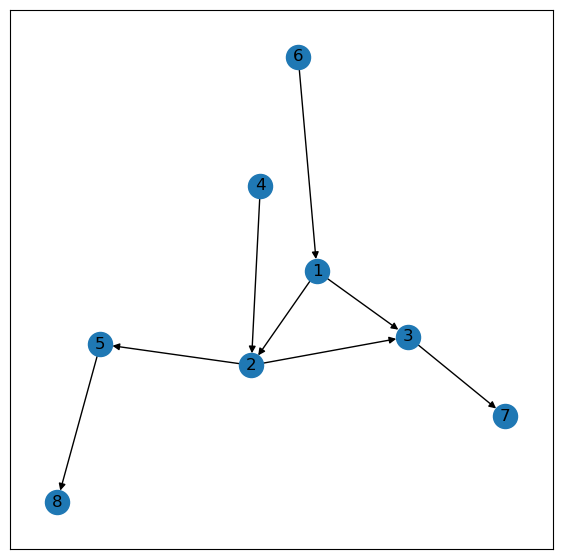

In [14]:
plt.figure(figsize=(7,7))
#pos = nx.circular_layout(D)
pos = graphviz_layout(G, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(G,with_labels = True)

KeyError: 'Oops, there is no node with label "9" in the graph'

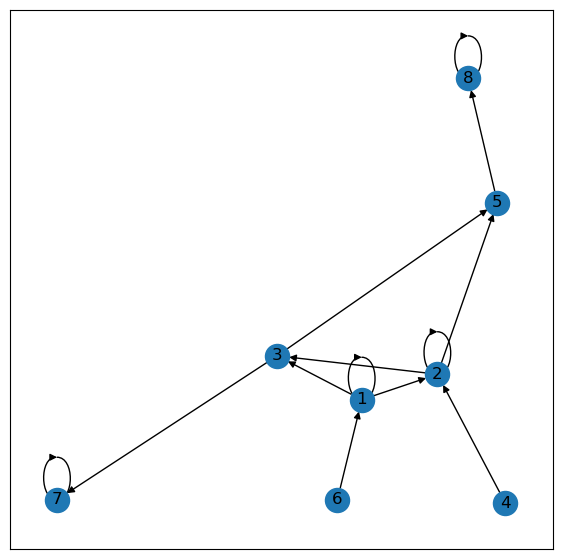

In [34]:
G.add_edges_from([(2,3), (3,5), (7,7),(2,2), (8,8), (1,1) ])
plt.figure(figsize=(7,7))
#pos = nx.circular_layout(D)
pos = graphviz_layout(G, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(G,with_labels = True)
print(general_neighborhood(G, 2, 9))


In [18]:

def is_transitive(G):
   
    # Create a dictionary to store the edges of the graph.
    edges = {}
    for a, b in G.edges():
        # If the starting node is not in the dictionary, add it as a new key
        if a not in edges:
            edges[a] = []
        edges[a].append(b)

    # Check whether the graph is transitive
    for a in edges:
        visited = set()   #nusing a set to store the visited nodes
        stack = edges[a][:]
        while stack:
            # Pop the last element from the stack
            b = stack.pop()
            # If the node has already been visited, skip it
            if b in visited:
                continue
            else:
             visited.add(b)
            # If the node is in the edges dictionary, add its edges to the stack
            if b in edges:
                stack.extend(edges[b])
        # Iterating over the visited set to check whether there is a path from
        # every node in the set back to the starting node
        for w in visited:
            # If the node is in the edges dictionary and the starting node is not
            # in the list of edges for that node, then the graph is not transitive
            if w in edges and a not in edges[w]:
                return False
   
    return True


In [16]:
print(is_transitive(G))


False


In [17]:
P= nx.DiGraph()
P.add_edges_from([(2, 3)])
print(is_transitive(P))


True


In [19]:
import networkx as nx


def transitive_closure(G):
    """
    Returns the transitive closure of the directed graph G.
    """
    # Creating a new graph H as a copy of G
    H = G.copy()

    for i in H.nodes():
        for j in H.nodes():
            # investigating if there exist is a path from i to j in H
            if nx.has_path(H, i, j):
                H.add_edge(i, j)

    return H


DiGraph with 7 nodes and 24 edges


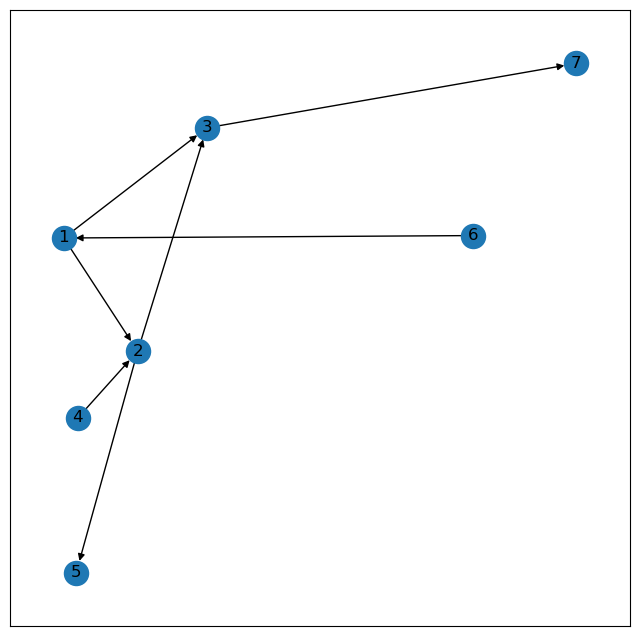

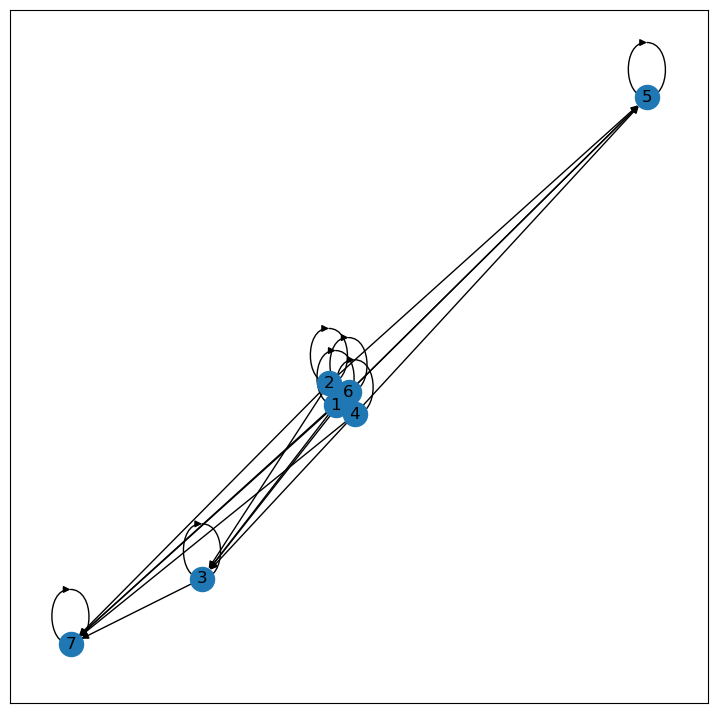

In [20]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,7), (4,2), (6,1), (2,5)])
plt.figure(figsize=(8,8))
#pos = nx.circular_layout(D)
pos = graphviz_layout(G, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(G,with_labels = True)
print(transitive_closure(G))
T = transitive_closure(G)
plt.figure(figsize=(9,9))
#pos = nx.circular_layout(D)
pos = graphviz_layout(T, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(T,with_labels = True)